# Customer Churn Prediction System
# This code implements a machine learning model to predict telecom customer churn
# Features: Data preprocessing, Random Forest model, feature importance, confusion matrix, ROC curve
# Tech: Python, Scikit-learn, Pandas, Matplotlib, Seaborn
# Designed to run in Google Colab

In [1]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulated telecom dataset (replace with actual dataset, e.g., from Kaggle)
data = {
    'tenure': [1, 34, 2, 45, 8, 22, 10, 28, 14, 60],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.75, 104.80, 56.15],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'Month-to-month',
                 'Month-to-month', 'Month-to-month', 'Two year', 'Month-to-month', 'One year'],
    'InternetService': ['DSL', 'DSL', 'DSL', 'No', 'Fiber optic', 'Fiber optic', 'Fiber optic', 'No', 'Fiber optic', 'DSL'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Electronic check', 'Bank transfer', 'Credit card',
                     'Electronic check', 'Credit card', 'Mailed check', 'Electronic check', 'Bank transfer'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

In [4]:
# Data Preprocessing
def preprocess_data(df):
    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Encode target variable
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    return df

In [5]:
# Preprocess the dataset
df = preprocess_data(df)

In [6]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


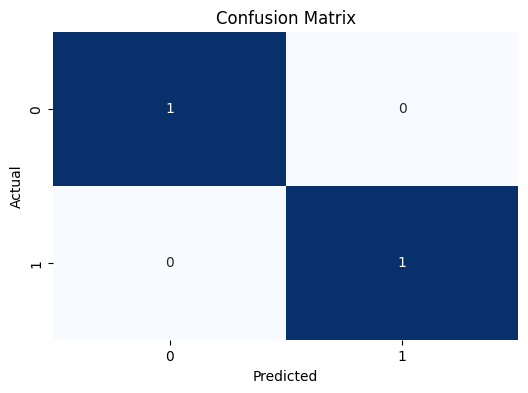

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



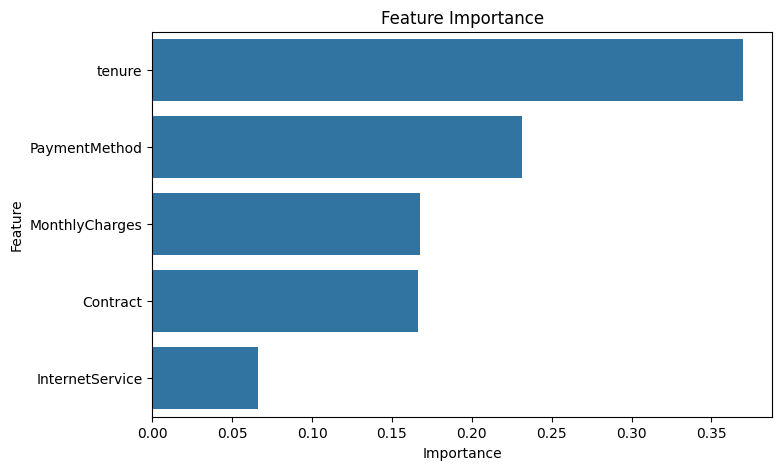

In [13]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [14]:
# ROC Curve
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

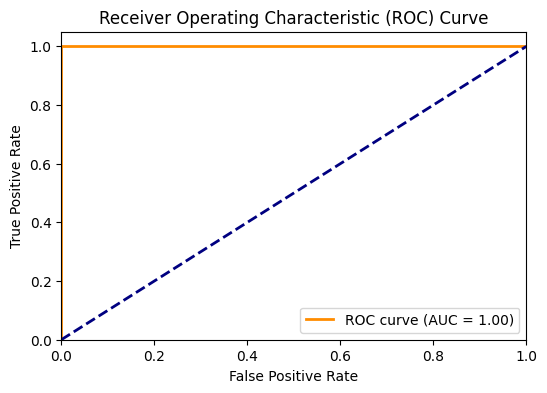

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Fixed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Save the model (optional)
import joblib
joblib.dump(rf_model, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']